[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saulventura/LoanEligibility/blob/master/LoanEligibility.ipynb)
  
    

# Project:

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 


As part of data set provided, we will ingest both the files and will perform data analysis on top of it

**Import Python Pandas

In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

### Data Collection
**Let's import files provided


In [3]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [4]:
train_orig = pd.read_csv('https://raw.githubusercontent.com/saulventura/LoanEligibility/master/dataset/train_ctrUa4K.csv')

In [5]:
test_orig  = pd.read_csv('https://raw.githubusercontent.com/saulventura/LoanEligibility/master/dataset/test_lAUu6dG.csv')

In [6]:
train_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


test_orig.info()

In [9]:
train_orig.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Preparation

Let's assing original dataframes to new ones.

In [10]:
train = train_orig
test = test_orig

Renaming column labels when they contain blank spaces or any special character


In [11]:
def rename_column_labels(df, old_str = " ", new_str = "_"):
    """Rename column names to avoid special characters or blank spaces.
           Parameters:
               df (dataframe): The dataframe whose columns's names will be evaluated
               old_str (str): The character from the column's names to be replaced
               new_str (str): The character that will replace 'old_str'
            Returns:
               df (dataframe): The input dataframe with the columns renamed
    """
    display(Markdown('**Results:**' ))
    cols = df.loc[:,df.columns.str.contains(old_str)].shape[1]
    if cols > 0:
        print("Features changed => {0}".format(cols))
        display(df.loc[:,df.columns.str.contains(old_str)].columns.values)
        df.columns = [label.replace(old_str, new_str ) for label in df.columns]
    else:
        print("No changes were applied")
    return df

In [12]:
train = rename_column_labels(train)

**Results:**

No changes were applied


In [13]:
test = rename_column_labels(test)

**Results:**

No changes were applied


**4.1 Remove Columns/Rows**


<strong>Let's check what columns are indexes.</strong>

In [14]:
def list_index_columns(df):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() == len(df):
            print(f"{col.ljust(25)}" +  ' ==> Datatype: ' + str(df[col].dtypes) )

In [15]:
list_index_columns(train)

**Results:**

Loan_ID                   ==> Datatype: object


<strong>Let's do a quick review of list of values per each column.</strong>


In [16]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [17]:
list_column_values(train,10,'False')

**Results:**

Gender                    ==> ['Female', 'Male', nan]
Married                   ==> ['No', 'Yes', nan]
Dependents                ==> ['0', '1', '2', '3+', nan]
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes', nan]
Loan_Amount_Term          ==> [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0, nan]
Credit_History            ==> [0.0, 1.0, nan]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']
Loan_Status               ==> ['N', 'Y']


In [18]:
list_column_values(test,10,'False')

**Results:**

Gender                    ==> ['Female', 'Male', nan]
Married                   ==> ['No', 'Yes']
Dependents                ==> ['0', '1', '2', '3+', nan]
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes', nan]
Credit_History            ==> [0.0, 1.0, nan]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']


In [19]:
def list_column_values_percentage(df, number_of_values):
    display(Markdown('**Results:**' ))
    print('Columns with less than ' + str(number_of_values) + ' values')
    for col in df.columns[0:]:
        if train[col].nunique() <= number_of_values:
            print(df[col].value_counts()/len(train)) 

In [20]:
list_column_values_percentage(train,3)

**Results:**

Columns with less than 3 values
Male      0.796417
Female    0.182410
Name: Gender, dtype: float64
Yes    0.648208
No     0.346906
Name: Married, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64
1.0    0.773616
0.0    0.144951
Name: Credit_History, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


In [21]:
list_column_values_percentage(test,3)

**Results:**

Columns with less than 3 values
Male      0.465798
Female    0.114007
Name: Gender, dtype: float64
Yes    0.379479
No     0.218241
Name: Married, dtype: float64
Graduate        0.460912
Not Graduate    0.136808
Name: Education, dtype: float64
No     0.500000
Yes    0.060261
Name: Self_Employed, dtype: float64
1.0    0.454397
0.0    0.096091
Name: Credit_History, dtype: float64
Urban        0.228013
Semiurban    0.188925
Rural        0.180782
Name: Property_Area, dtype: float64


In [22]:
def remove_column_values(df, columns_to_remove):
    display(Markdown('**Results:**'))
    print("Original number of features => {}".format(df.shape[1]))
    df = df.drop(columns_to_remove, axis=1)
    print("Number of features has been reduced to => {}".format(df.shape[1]))
    return df

** Let's remove column Loan ID **

In [23]:
train = remove_column_values(train,'Loan_ID')

**Results:**

Original number of features => 13
Number of features has been reduced to => 12


In [24]:
test = remove_column_values(test,'Loan_ID')

**Results:**

Original number of features => 12
Number of features has been reduced to => 11


**Missing Values**

In [25]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        display(Markdown('**Results:**'))
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [28]:
missing_values_table(train)

**Results:**

Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


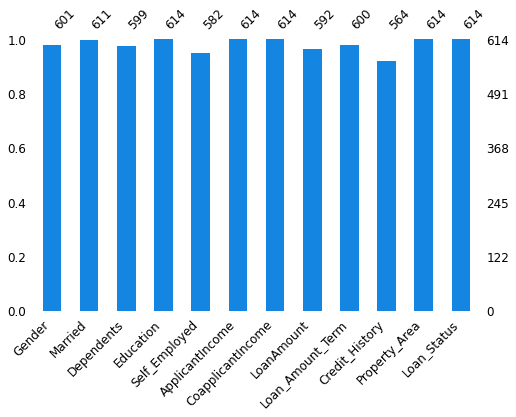

In [29]:
msno.bar(train, color = '#1585E2',fontsize=12,figsize = (8, 5))

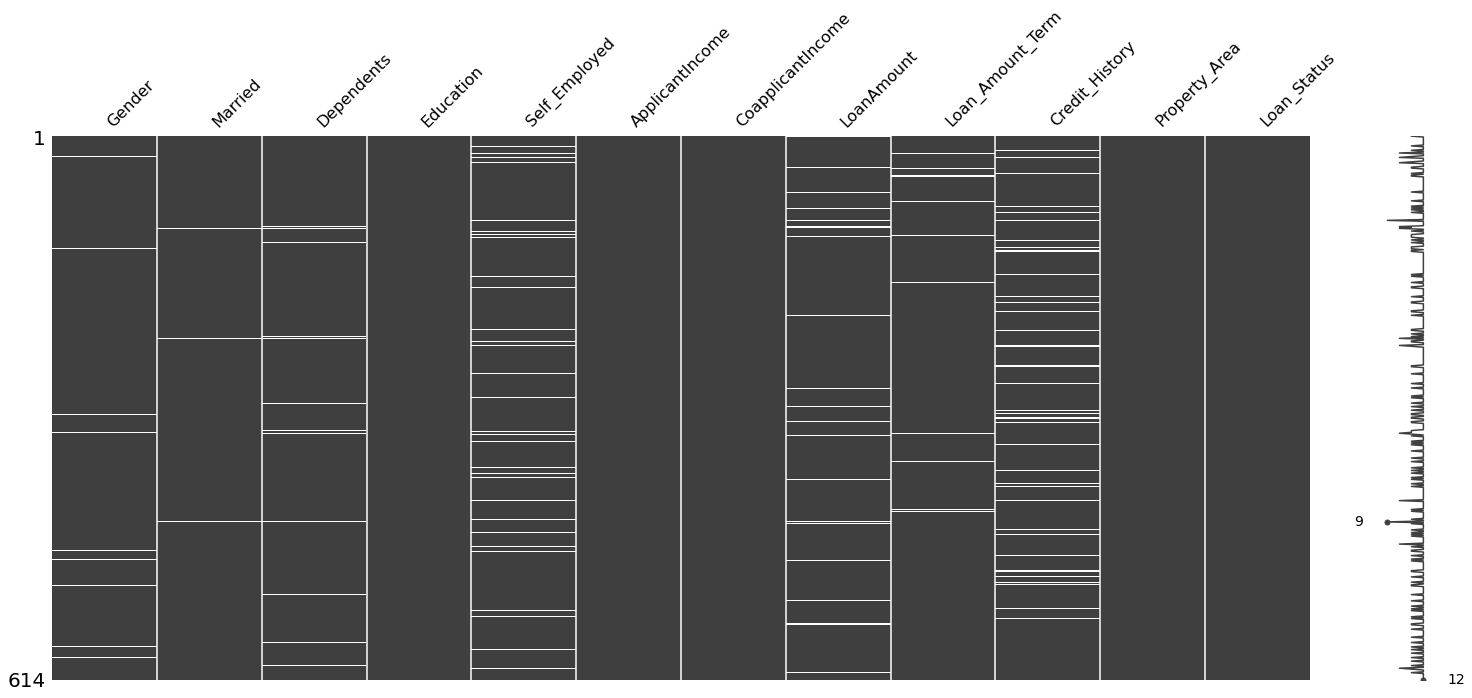

In [30]:
msno.matrix(train)


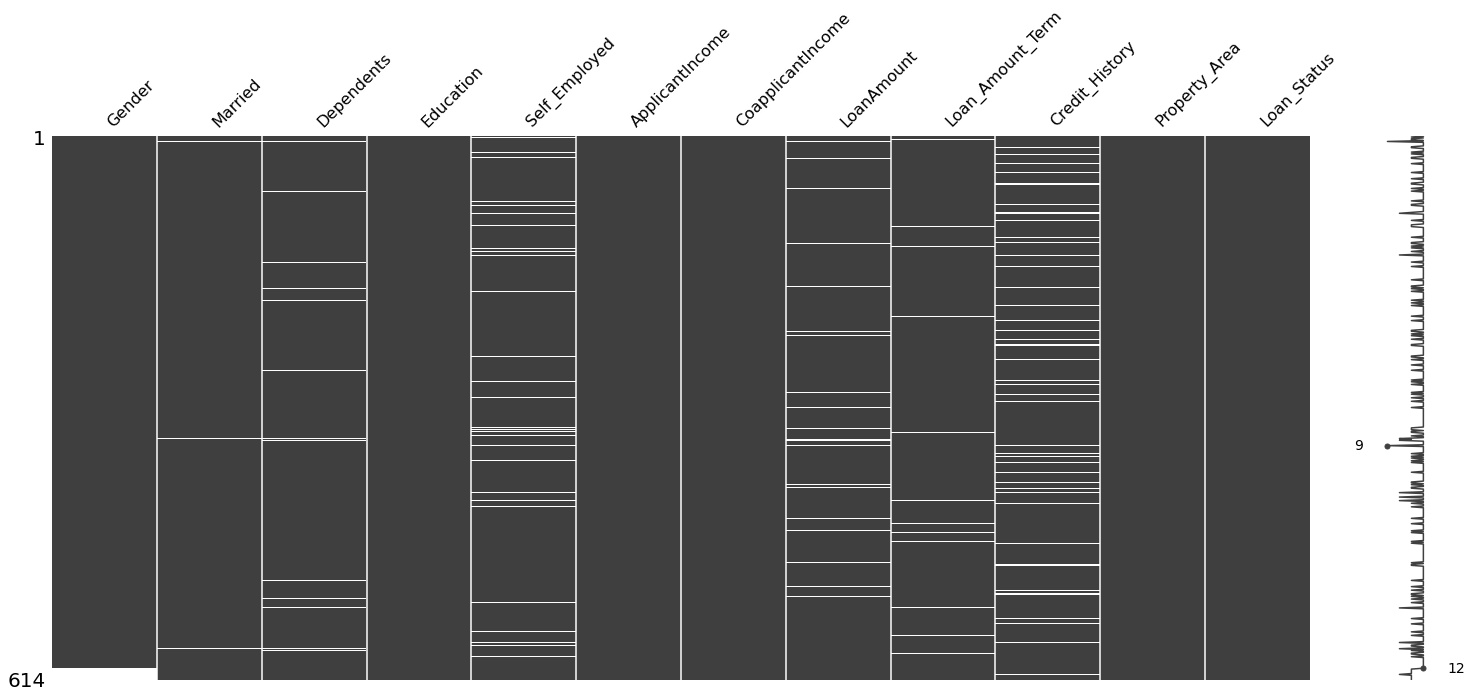

In [31]:
#sorted by gender
sorted = train.sort_values('Gender')
msno.matrix(sorted)

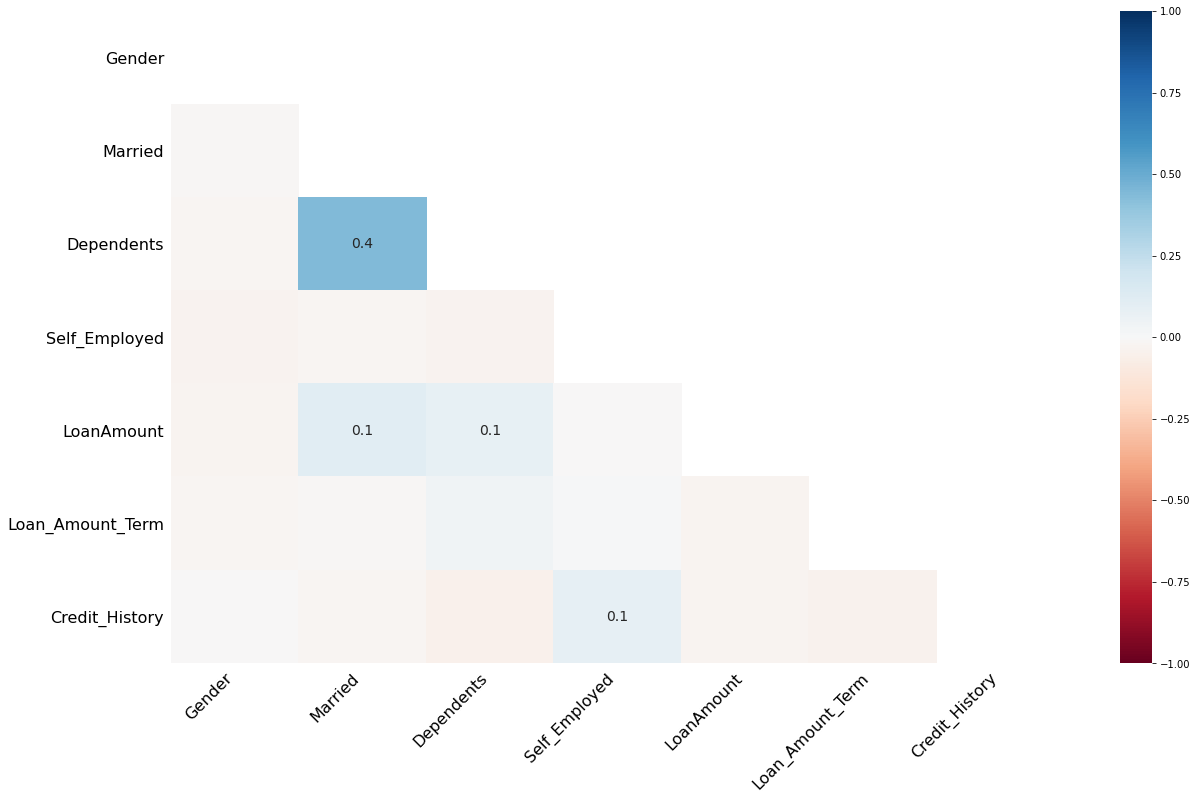

In [32]:
msno.heatmap(train)

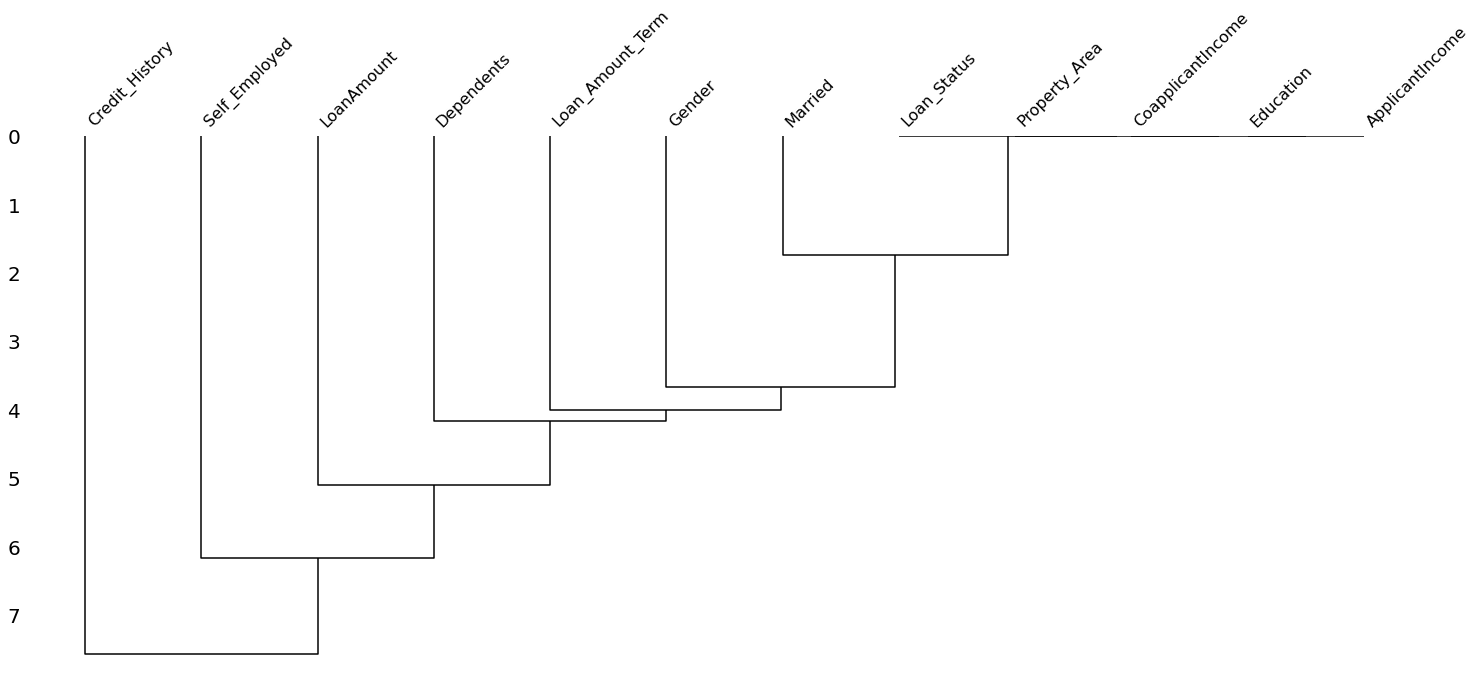

In [33]:
msno.dendrogram(train)

**Let's remove selected columns/rows with missing values.**

** Since there is no clear understanding/portion of missing columns, I don't plan to drop any columns from the list ** 

### Imputation

### New imputation technique: using regression model


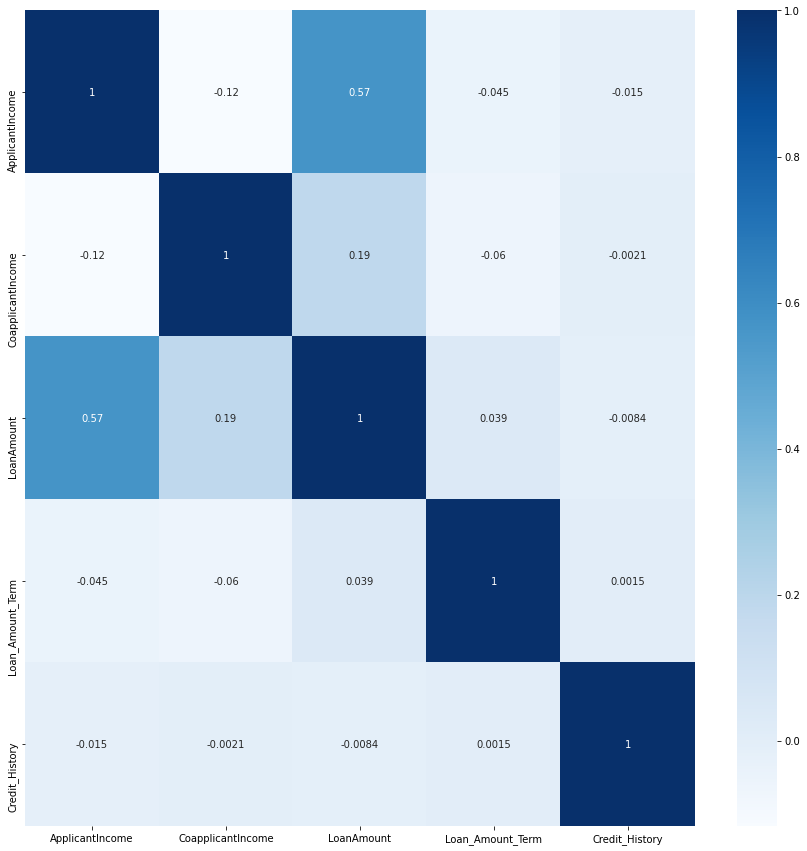

In [34]:
plt.subplots(figsize=(15,15))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

In [35]:
def regressor_inputer(df, output_column, input_column, decimals=2):
    
    display(Markdown('**Results:**'))
    #Missing values from Output column
    missing_output = df[output_column].isnull()
    print("Number of missing values in column: {} => {}".format(output_column,missing_output.sum() ))
    
    df_regressor = df.dropna(axis=0, subset = [output_column,input_column])
    df_regressor = df_regressor.loc[:,[output_column,input_column]]
    #Input column observations with Output column missing
    input_column_with_missing_output_column = pd.DataFrame(df[input_column][missing_output])
    input_column_with_missing_output_column = input_column_with_missing_output_column.dropna()
    #Creating regressor model
    x = df_regressor[[input_column]]
    y = df_regressor[[output_column]]
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    lm = LinearRegression().fit(x_train,y_train)
    print(f'R2 value in validation partition: {lm.score(x_val, y_val)}')
    #Predicting output column
    predictor = df[input_column][ df[output_column].isnull()  &  ~df[input_column].isnull() ] 
    predictor = pd.DataFrame(predictor)
    predictor[output_column]=  lm.predict( predictor[[input_column]] ) 
    df.loc[ df[output_column].isnull()  &  ~df[input_column].isnull() ,[output_column]] = predictor[output_column].round(decimals)
    print("New number of missing values in column: {} => {}".format(output_column, df[output_column].isnull().sum() ))
    return df
    #NOT CLEAR ON THIS FUNCTION 

In [36]:
train = regressor_inputer(train,'LoanAmount','ApplicantIncome',0)

**Results:**

Number of missing values in column: LoanAmount => 22
R2 value in validation partition: 0.09974555421522513
New number of missing values in column: LoanAmount => 0


In [37]:
missing_values_table(train)

**Results:**

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [38]:
test = regressor_inputer(test,'LoanAmount','ApplicantIncome',0)

**Results:**

Number of missing values in column: LoanAmount => 5
R2 value in validation partition: 0.1636921634743771
New number of missing values in column: LoanAmount => 0


<strong>Let's use mean/mode/median technique to impute missing values for column(s) identified in previous step.</strong>

In [39]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [40]:
train["Credit_History"] = most_frequent_imputer.fit_transform(train[["Credit_History"]])
train["Self_Employed"] = most_frequent_imputer.fit_transform(train[["Self_Employed"]])
train["Dependents"] = most_frequent_imputer.fit_transform(train[["Dependents"]])
train["Loan_Amount_Term"] = most_frequent_imputer.fit_transform(train[["Loan_Amount_Term"]])
train["Gender"] = most_frequent_imputer.fit_transform(train[["Gender"]])
train["Married"] = most_frequent_imputer.fit_transform(train[["Married"]])

<strong>Now, let's check the missingness of the dataset.</strong>

In [41]:
missing_values_table(train)

**Results:**

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [42]:
test["Credit_History"] = most_frequent_imputer.fit_transform(test[["Credit_History"]])
test["Self_Employed"] = most_frequent_imputer.fit_transform(test[["Self_Employed"]])
test["Dependents"] = most_frequent_imputer.fit_transform(test[["Dependents"]])
test["Loan_Amount_Term"] = most_frequent_imputer.fit_transform(test[["Loan_Amount_Term"]])
test["Gender"] = most_frequent_imputer.fit_transform(test[["Gender"]])
test["Married"] = most_frequent_imputer.fit_transform(test[["Married"]])

In [43]:
missing_values_table(test)

**Results:**

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


 #### Transforming Columns

<strong>Let's review object columns.</strong>

In [44]:
print("Column data types and their frequency\n{}".format(train.dtypes.value_counts()))

Column data types and their frequency
object     7
float64    4
int64      1
dtype: int64


In [45]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
def check_object_columns(df):
    object_columns_df = df.select_dtypes(include=['object'])
    print(object_columns_df.iloc[0])
    i=0
    for col in object_columns_df:
        if is_numeric_dtype(df[col]):
            i+=1
            print(f"{col.ljust(25)}" + ' ==> is Numeric')
    if i==0:
        display(Markdown('**Results:**'))
        print('No numeric columns were found')

In [47]:
check_object_columns(train)

Gender               Male
Married                No
Dependents              0
Education        Graduate
Self_Employed          No
Property_Area       Urban
Loan_Status             Y
Name: 0, dtype: object


**Results:**

No numeric columns were found


** Let's convert columns **

In [48]:
def columns_to_numeric(df,columns_to_convert = []):
    display(Markdown('**Results:**'))
    for col in columns_to_convert:
        if col in df.columns:
            if is_numeric_dtype(df[col]):
                df[col] = df[col].str.rstrip('%').astype('float')
                print("Column {} was converted".format(col))
            else:
                print("Column {} could not be converted".format(col))
        else:
            print("Column {} does not exist".format(col))
    return df

In [49]:
train = columns_to_numeric(train,[])
# Not sure why giving error on float columns ==> it only applies to STRING columns with numeric values

**Results:**

<div class="alert alert-block alert-info">
<b><h1>5. Exploratory Data Analysis</h1></div>
</a><a class="anchor" id="exploration"></a>

EDA is the process of performing initial investigations on data so as to:

<li>Uncover underlying structure & patterns in the data
<li>Identify important variables
<li>Identify anomalies
<li>Test a hypothesis
<li>Check assumptions
<li>Set the stage for model development

Exploratory Data Analysis is like listening to what the data can tell us before we start the actual modeling process for a head start. 

** Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.**

Target column is assigned to l_target variable.

In [50]:
l_target = 'Loan_Status'

<div class="alert alert-block alert-warning">
<b>5.1 Univariate Analysis</b>
</div> </a><a class="anchor" id="univariate"></a>

<strong>Let's quick review target column values/distribution.</strong>

In [51]:
list_column_values_percentage(train,15)

**Results:**

Columns with less than 15 values
Male      0.81759
Female    0.18241
Name: Gender, dtype: float64
Yes    0.653094
No     0.346906
Name: Married, dtype: float64
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64
360.0    0.856678
180.0    0.071661
480.0    0.024430
300.0    0.021173
84.0     0.006515
240.0    0.006515
120.0    0.004886
36.0     0.003257
60.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64
1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


In [52]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

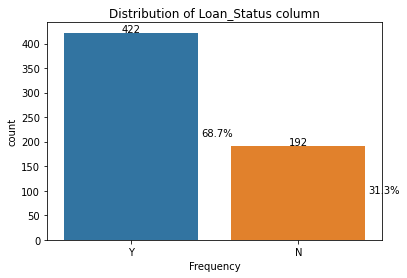

In [53]:
plot_target_column(train, l_target)

** Let's do again a quick review of list of values per each column **

In [54]:
list_column_values(train,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Married                   ==> ['No', 'Yes']
Dependents                ==> ['0', '1', '2', '3+']
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes']
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']
Loan_Status               ==> ['N', 'Y']


**Let's plot categorical columns.**

In [55]:
def plot_categorical_columns(df):
    categorical = train.select_dtypes(exclude=['int', 'float']).columns
    lcols_in_plot = 2
    lrows_in_plot = math.ceil(len(categorical)/lcols_in_plot)   
    fig, ax = plt.subplots( lrows_in_plot, lcols_in_plot , figsize=(20, 30))
    plt.subplots_adjust(wspace=0.2, hspace=1) 
    sns.set(font_scale = 1.1)
    for variable, subplot in zip(categorical, ax.flatten()):
        sns.countplot(train[variable], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")
            label.set_rotation_mode("anchor")

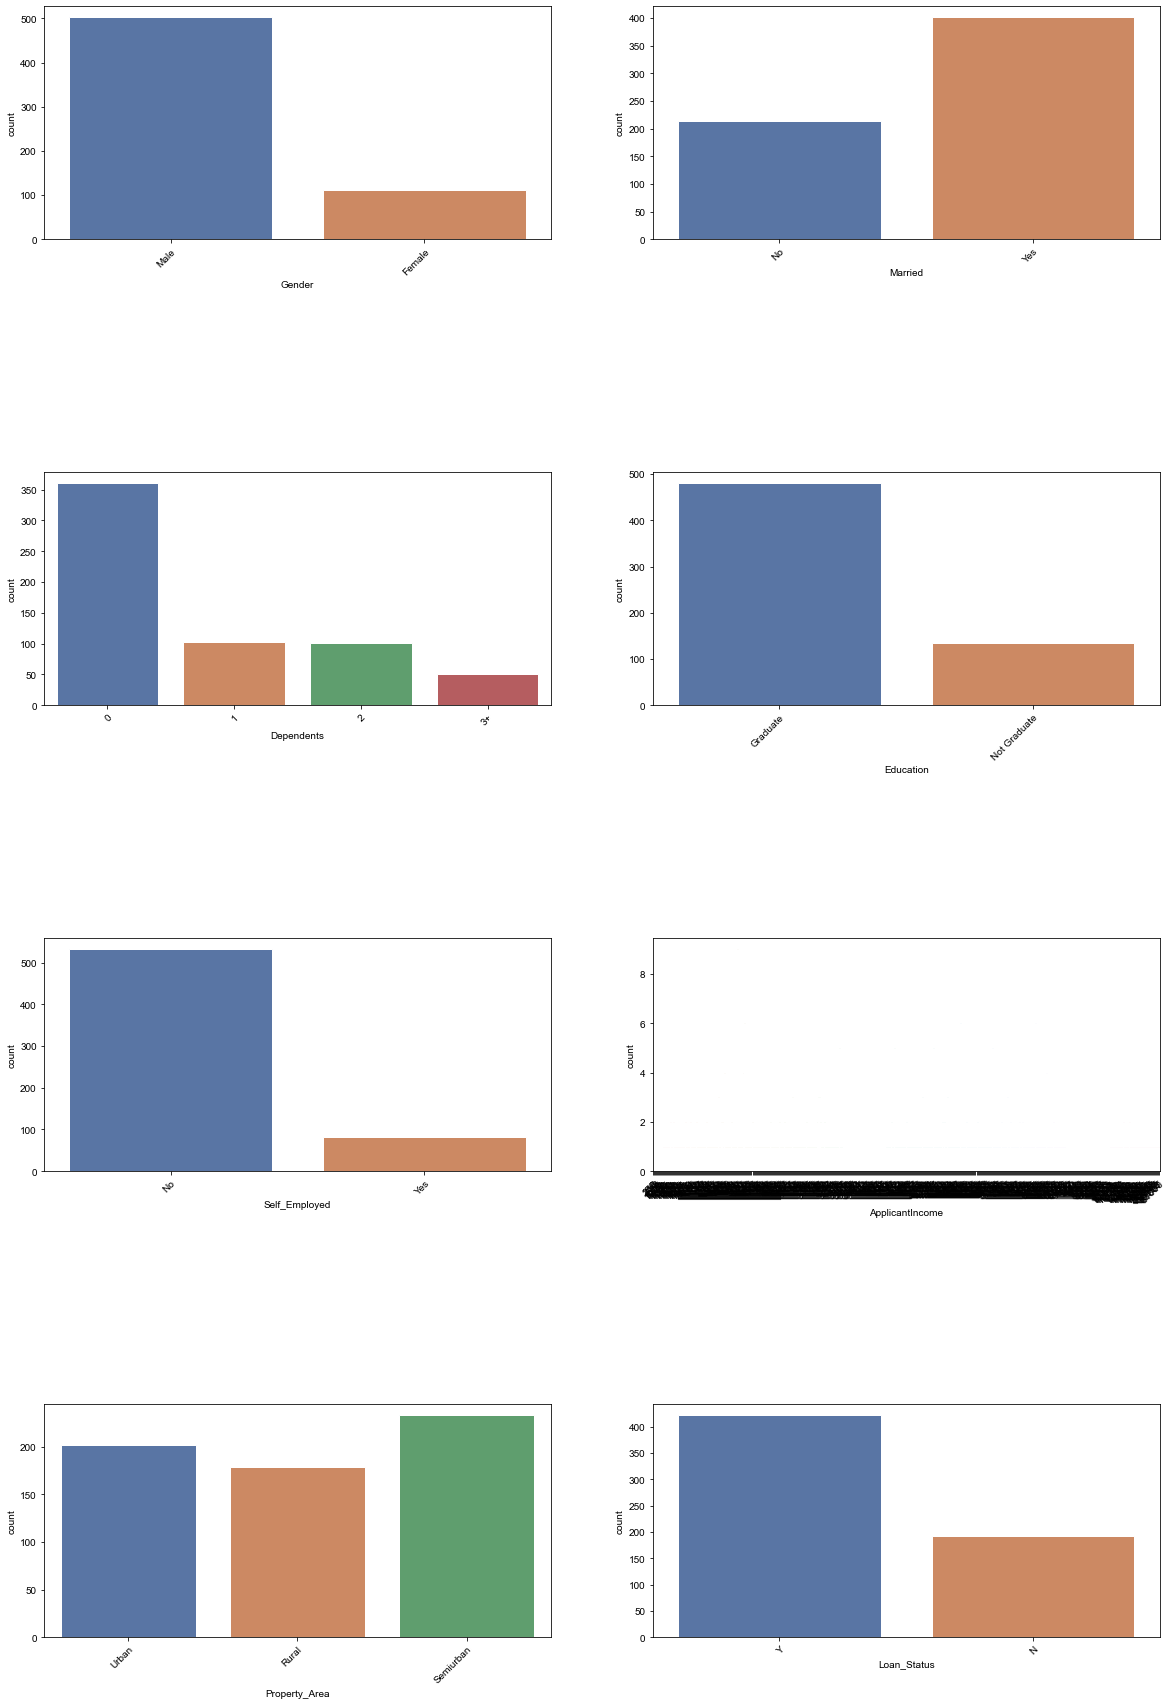

In [56]:
plot_categorical_columns(train)

** Let's plot numerical columns. Using standard and customized function.**

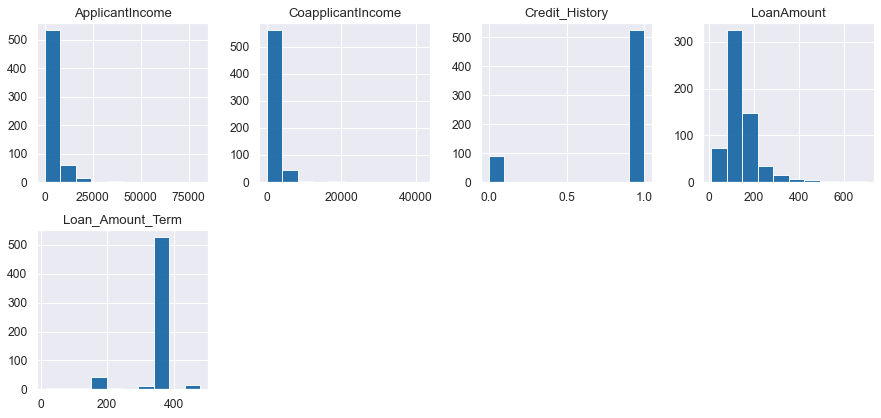

In [57]:
hist = train.hist(figsize = (15, 22), layout=(6, 4) , color='#1363a1',alpha=0.9 )

In [58]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

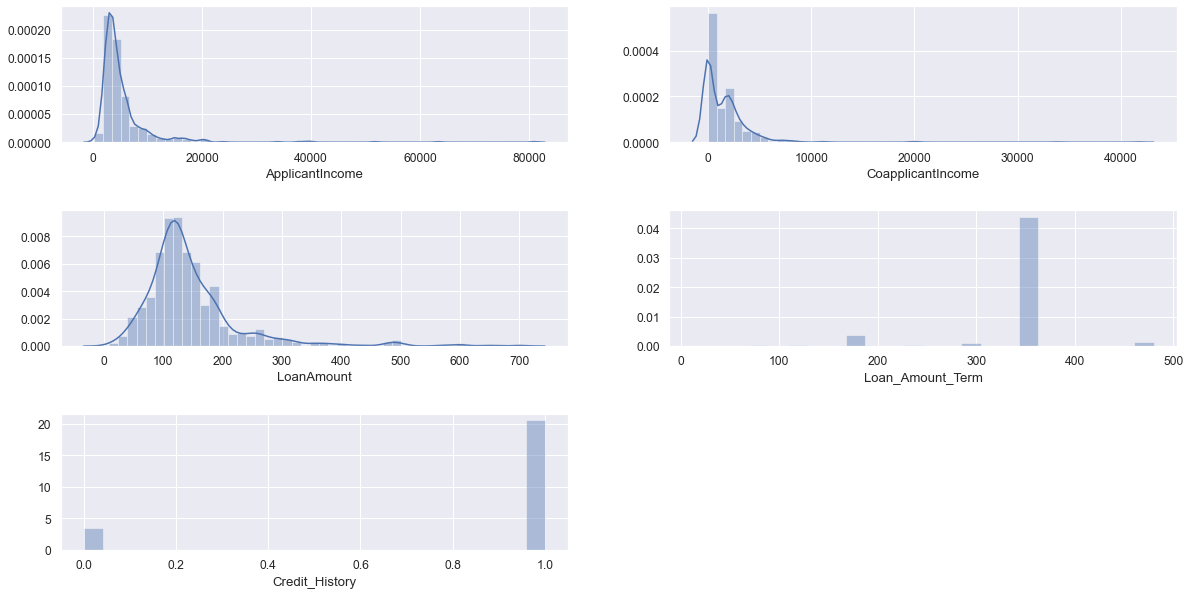

In [59]:
plot_numerical_columns(train)
### Not sure why I get this error

In [60]:
train.select_dtypes(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [61]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<div class="alert alert-block alert-warning">
<b>5.2 Bi-variate Analysis</b>
</div> </a><a class="anchor" id="bivariate"></a>

**Let's use crosstab function.**


In [62]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,151.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [63]:
col = train.Credit_History
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total", normalize='index')

Credit_History,0.0,1.0
Loan_Status,,
N,0.427083,0.572917
Y,0.016588,0.983412
Total,0.144951,0.855049


In [64]:
col = train.Credit_History
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total")
# These values are using absolute numbers

Credit_History,0.0,1.0,Total
Loan_Status,,,
N,82,110,192
Y,7,415,422
Total,89,525,614


** pairplot() takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable :**

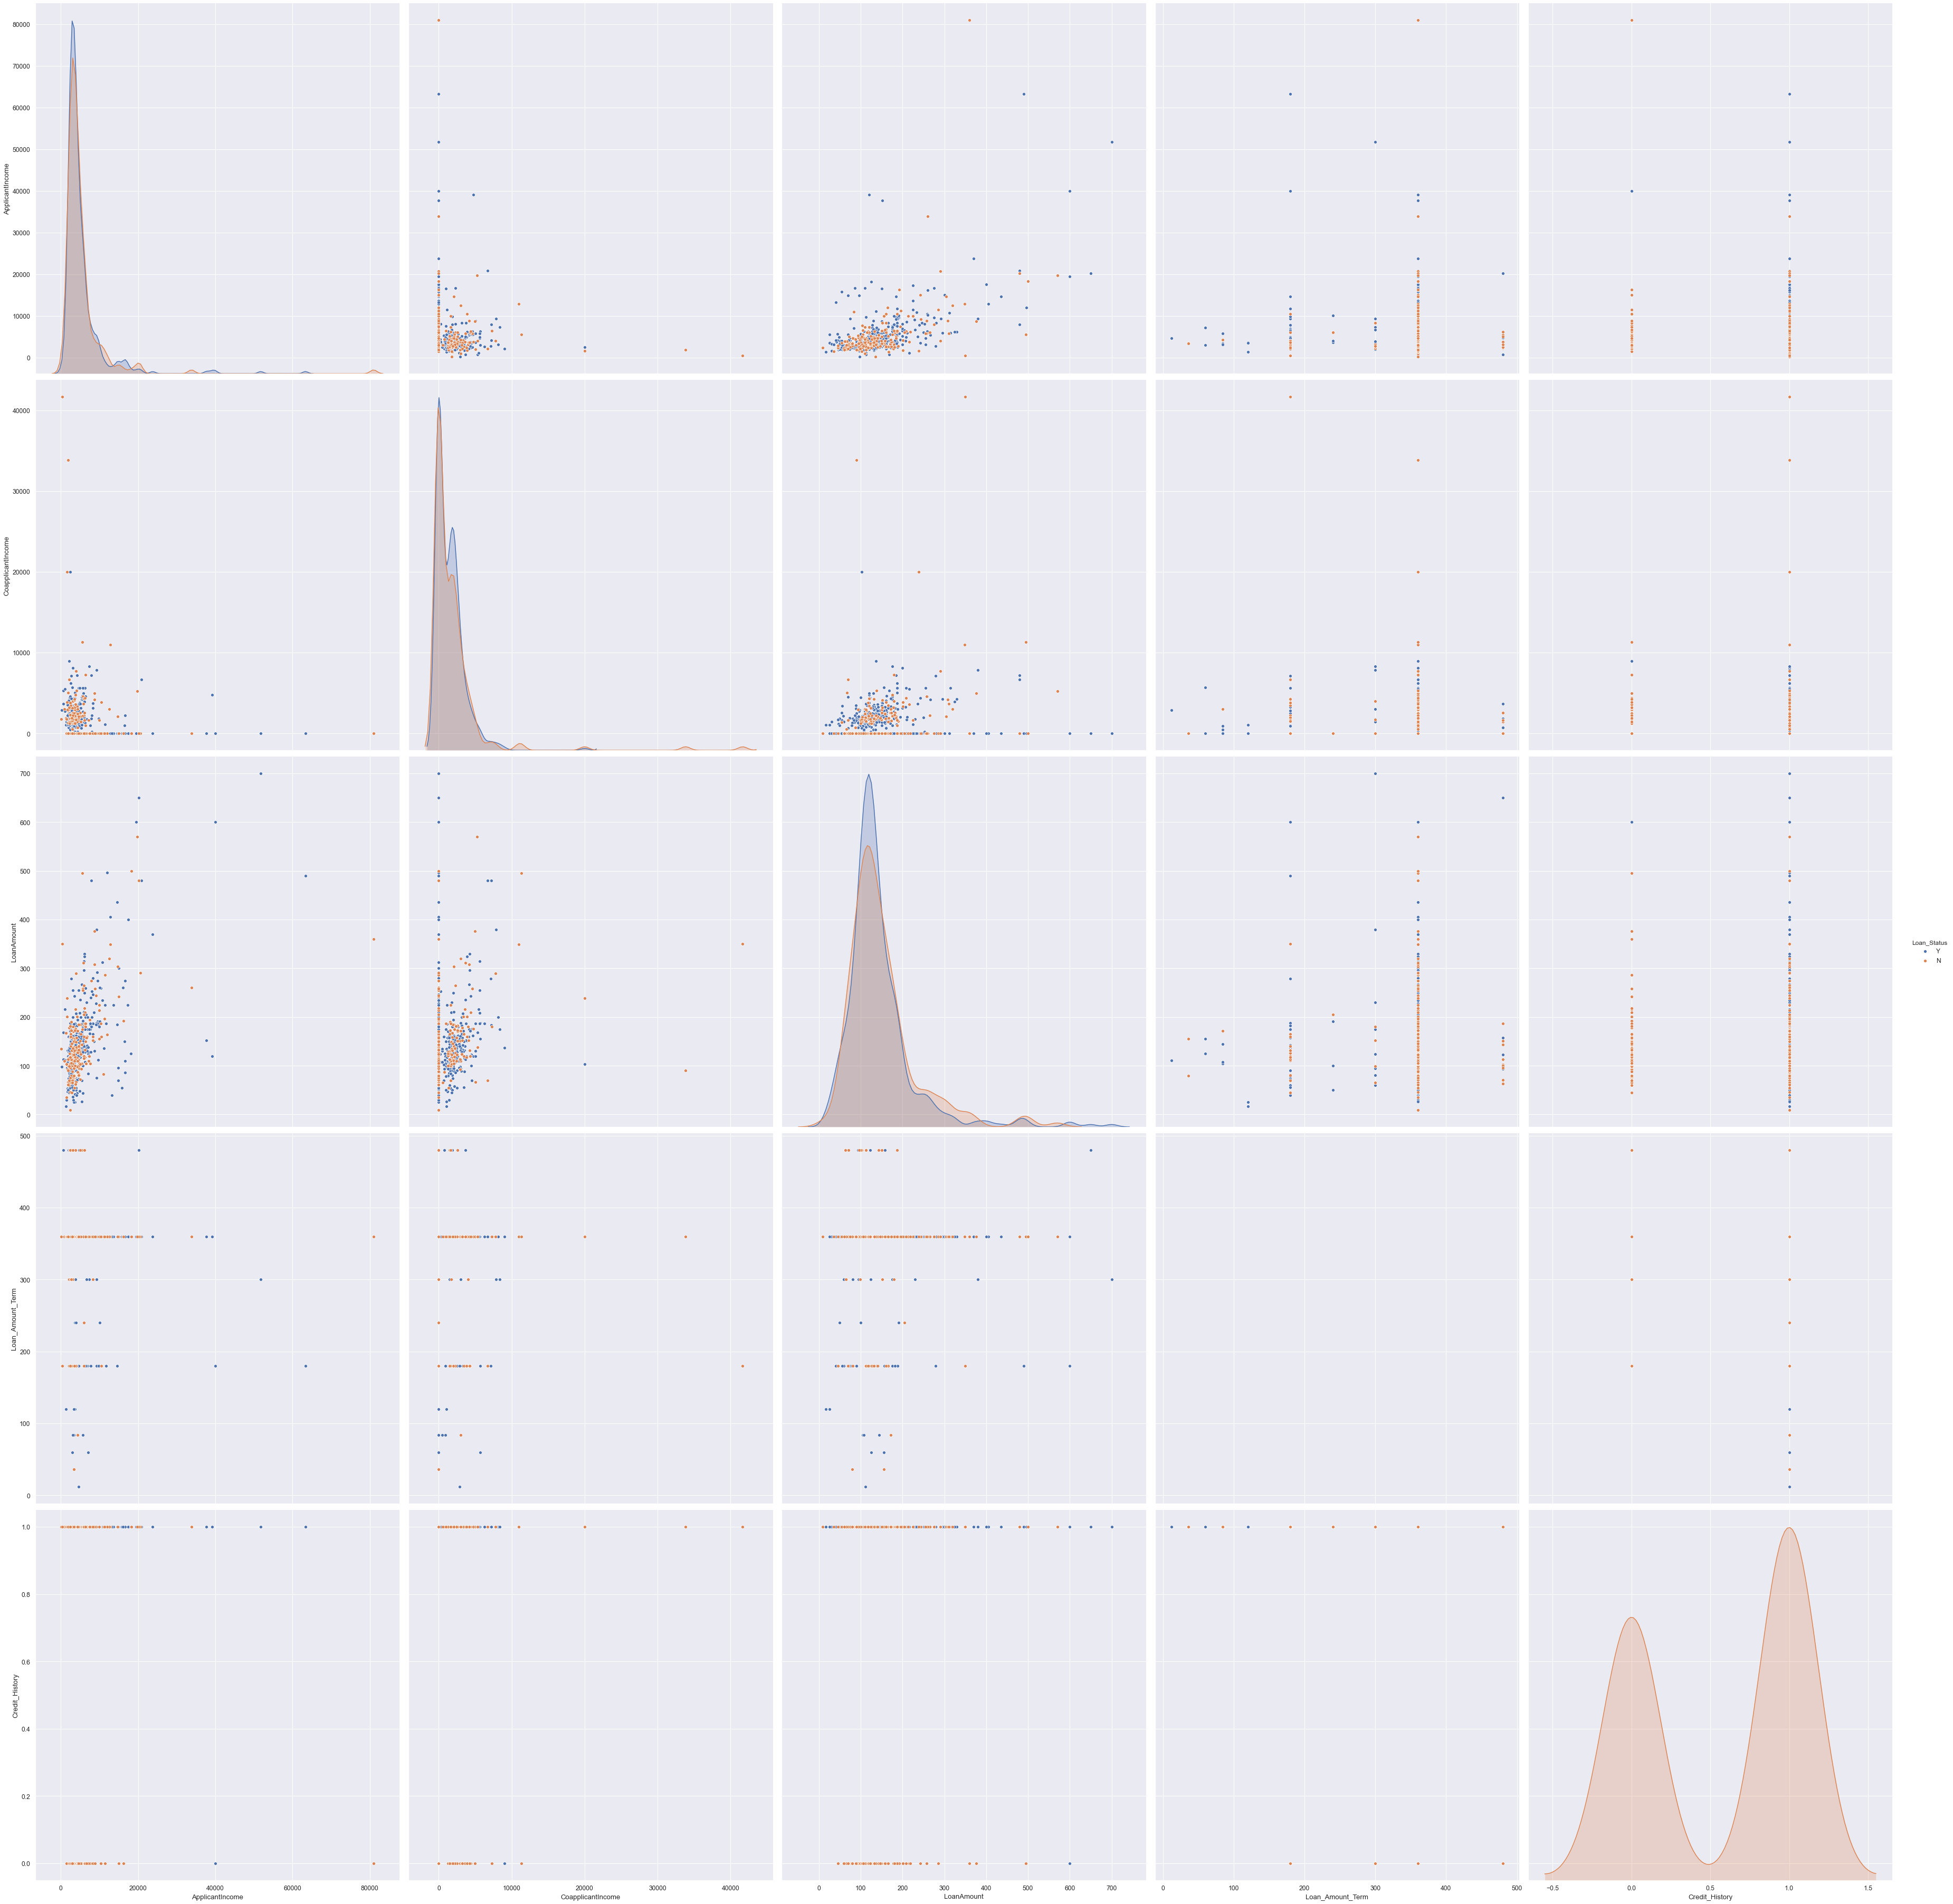

In [65]:
sns.pairplot(data=train, hue=l_target,  height=10);

In [66]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,151.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<div class="alert alert-block alert-info">
<b><h1>6. Feature Engineering</h1></div>
</a><a class="anchor" id="engineering"></a>

<strong>Let's move original tables to new ones.</strong>

In [67]:
train1 = train
test1 = test

In [68]:
print("Column data types and their frequency\n{}".format(train1.dtypes.value_counts()))

Column data types and their frequency
object     7
float64    4
int64      1
dtype: int64


In [69]:
list_column_values(train1,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Married                   ==> ['No', 'Yes']
Dependents                ==> ['0', '1', '2', '3+']
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes']
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']
Loan_Status               ==> ['N', 'Y']


In [70]:
list_column_values(test1,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Married                   ==> ['No', 'Yes']
Dependents                ==> ['0', '1', '2', '3+']
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes']
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [6.0, 12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 350.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']


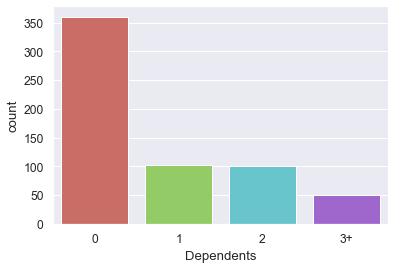

In [71]:
sns.countplot(x='Dependents',data=train1, palette='hls')
plt.show();

<div class="alert alert-block alert-warning">
<b>6.1 General Transformation</b>
</div> </a><a class="anchor" id="general_trans"></a>

<strong>Let's replace categorical values with numerical values.</strong>

In [72]:
#train['education_level'].replace(['Primary School','High School','Graduate','Masters','Phd'],[1,2,3,4,5],inplace=True)

train1['Dependents'].replace(['0', '1', '2', '3+'],[0,1,2,3],inplace=True)


In [73]:
test1['Dependents'].replace(['0', '1', '2', '3+'],[0,1,2,3],inplace=True)


In [74]:
list_column_values(test1,15,'True')
list_column_values(train1,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Married                   ==> ['No', 'Yes']
Dependents                ==> [0, 1, 2, 3]
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes']
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [6.0, 12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 350.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']


**Results:**

Gender                    ==> ['Female', 'Male']
Married                   ==> ['No', 'Yes']
Dependents                ==> [0, 1, 2, 3]
Education                 ==> ['Graduate', 'Not Graduate']
Self_Employed             ==> ['No', 'Yes']
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> ['Rural', 'Semiurban', 'Urban']
Loan_Status               ==> ['N', 'Y']


In [75]:
#test['education_level'].replace(['Primary School','High School','Graduate','Masters','Phd'],[1,2,3,4,5],inplace=True)

test1['Education'].replace(['Graduate', 'Not Graduate'],[1,2],inplace=True)
train1['Education'].replace(['Graduate', 'Not Graduate'],[1,2],inplace=True)


In [76]:
test1['Gender'].replace(['Female', 'Male','nan'],[1,2,np.nan],inplace=True)


In [77]:
train1['Gender'].replace(['Female', 'Male', 'nan'],[1,2,np.nan],inplace=True)

In [78]:
train1['Self_Employed'].replace(['No', 'Yes'],[0,1],inplace=True)

In [79]:
test1['Self_Employed'].replace(['No', 'Yes'],[0,1],inplace=True)

In [80]:
train1['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[1, 2, 3],inplace=True)

In [81]:
test1['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[1, 2, 3],inplace=True)

In [82]:
test1['Married'].replace(['No', 'Yes'],[1,0],inplace=True)
train1['Married'].replace(['No', 'Yes'],[1,0],inplace=True)

In [83]:
list_column_values(test1,15,'True')
list_column_values(train1,15,'True')

**Results:**

Gender                    ==> [1, 2]
Married                   ==> [0, 1]
Dependents                ==> [0, 1, 2, 3]
Education                 ==> [1, 2]
Self_Employed             ==> [0, 1]
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [6.0, 12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 350.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> [1, 2, 3]


**Results:**

Gender                    ==> [1, 2]
Married                   ==> [0, 1]
Dependents                ==> [0, 1, 2, 3]
Education                 ==> [1, 2]
Self_Employed             ==> [0, 1]
ApplicantIncome           ==> more than 15 values
CoapplicantIncome         ==> more than 15 values
LoanAmount                ==> more than 15 values
Loan_Amount_Term          ==> [12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]
Credit_History            ==> [0.0, 1.0]
Property_Area             ==> [1, 2, 3]
Loan_Status               ==> ['N', 'Y']


<strong>Let's convert remaining object columns to strings.</strong>

In [84]:
def object_to_str(df, to_str_cols):
    for col in to_str_cols:
        df[col] = df[col].astype(str)
    return df

** I don't have any columns with values left as string. So leaving it as is **

<div class="alert alert-block alert-warning">
<b>6.2 Encoding</b>
</div> </a><a class="anchor" id="encoding"></a>

In [85]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,0,5849,0.0,151.0,360.0,1.0,3,Y
1,2,0,1,1,0,4583,1508.0,128.0,360.0,1.0,1,N
2,2,0,0,1,1,3000,0.0,66.0,360.0,1.0,3,Y
3,2,0,0,2,0,2583,2358.0,120.0,360.0,1.0,3,Y
4,2,1,0,1,0,6000,0.0,141.0,360.0,1.0,3,Y


In [86]:
print("Column data types and their frequency\n{}".format(train1.dtypes.value_counts()))

Column data types and their frequency
int64      7
float64    4
object     1
dtype: int64


<strong>LABEL ENCODER</strong>

<strong> It Doesn't looks like that I need to use any of the encoding methods</strong>

# SCALING

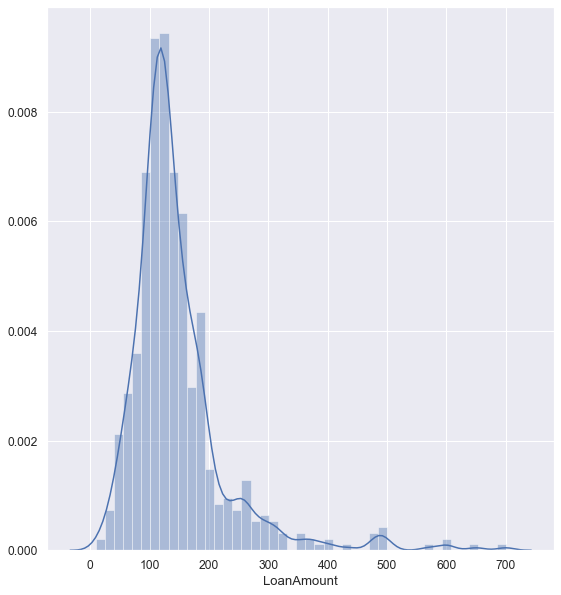

In [87]:
plot_numerical_columns(pd.DataFrame(train1['LoanAmount']))

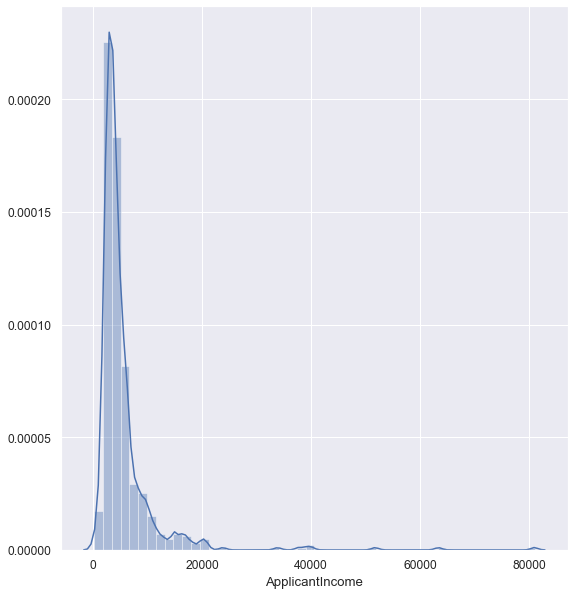

In [88]:
plot_numerical_columns(pd.DataFrame(train1['ApplicantIncome']))

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train1['LoanAmount'] = pd.DataFrame(scaler.fit_transform(train1[['LoanAmount']]))
train1['ApplicantIncome'] = pd.DataFrame(scaler.fit_transform(train1[['ApplicantIncome']]))


In [90]:
test1['LoanAmount'] = pd.DataFrame(scaler.fit_transform(test1[['LoanAmount']]))
test1['ApplicantIncome'] = pd.DataFrame(scaler.fit_transform(test1[['ApplicantIncome']]))

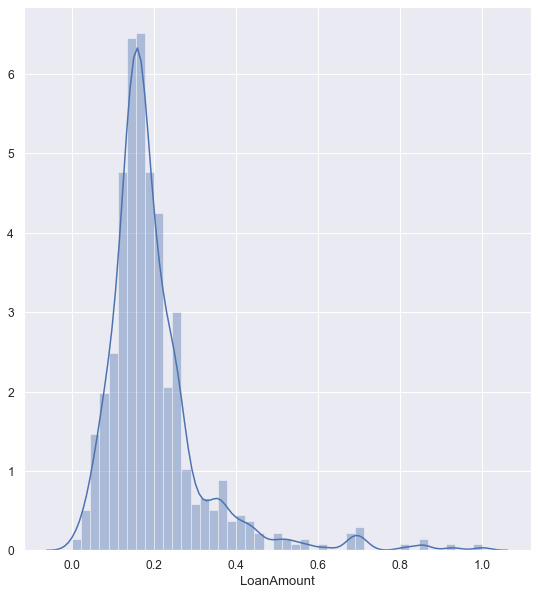

In [91]:
plot_numerical_columns(pd.DataFrame(train1['LoanAmount']))

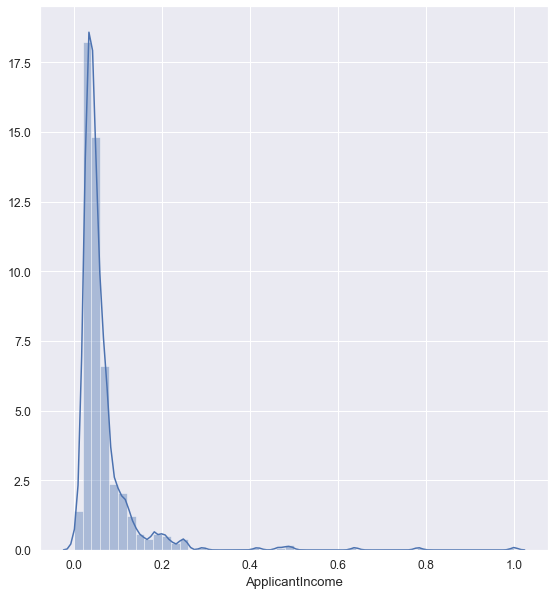

In [92]:
plot_numerical_columns(pd.DataFrame(train1['ApplicantIncome']))

<div class="alert alert-block alert-info">
<b><h1>7. Model Training</h1></div>
<a class="anchor" id="training"></a>

<strong>Let's split the training dataset</strong>

In [93]:
y = train1[l_target].reset_index(drop=True)
X = train1.drop([l_target], axis=1)

In [94]:
train1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,0,0.070489,0.0,0.205499,360.0,1.0,3,Y
1,2,0,1,1,0,0.054830,1508.0,0.172214,360.0,1.0,1,N
2,2,0,0,1,1,0.035250,0.0,0.082489,360.0,1.0,3,Y
3,2,0,0,2,0,0.030093,2358.0,0.160637,360.0,1.0,3,Y
4,2,1,0,1,0,0.072356,0.0,0.191027,360.0,1.0,3,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,0,0.034014,0.0,0.089725,360.0,1.0,1,Y
610,2,0,3,1,0,0.048930,0.0,0.044863,180.0,1.0,1,Y
611,2,0,1,1,0,0.097984,240.0,0.353111,360.0,1.0,3,Y
612,2,0,2,1,0,0.091936,0.0,0.257598,360.0,1.0,3,Y


In [95]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,1,0,0.070489,0.0,0.205499,360.0,1.0,3
1,2,0,1,1,0,0.054830,1508.0,0.172214,360.0,1.0,1
2,2,0,0,1,1,0.035250,0.0,0.082489,360.0,1.0,3
3,2,0,0,2,0,0.030093,2358.0,0.160637,360.0,1.0,3
4,2,1,0,1,0,0.072356,0.0,0.191027,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,0,0.034014,0.0,0.089725,360.0,1.0,1
610,2,0,3,1,0,0.048930,0.0,0.044863,180.0,1.0,1
611,2,0,1,1,0,0.097984,240.0,0.353111,360.0,1.0,3
612,2,0,2,1,0,0.091936,0.0,0.257598,360.0,1.0,3


In [96]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [97]:
X.shape, y.shape

((614, 11), (614,))

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [186]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=33)

In [187]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
421,1,1,0,2,0,0.031787,0.0,0.102750,360.0,0.0,3
366,2,1,0,1,0,0.029066,0.0,0.125904,480.0,1.0,2
126,2,0,3,1,0,0.292554,0.0,0.522431,360.0,1.0,1
42,2,0,0,1,0,0.027829,0.0,0.095514,360.0,1.0,3
65,2,0,0,1,0,0.068967,4595.0,0.360347,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
57,2,0,0,1,0,0.039777,2200.0,0.182344,360.0,1.0,1
201,2,1,2,1,0,0.059035,0.0,0.227207,360.0,0.0,2
578,2,0,1,1,0,0.020186,2232.0,0.141823,360.0,1.0,1
391,2,0,3,1,0,0.115696,0.0,0.384949,360.0,1.0,1


In [188]:
x_val

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
475,2,0,2,1,1,0.202536,1014.0,0.204052,360.0,1.0,1
577,2,1,0,1,0,0.038083,2739.0,0.146165,360.0,1.0,3
298,1,1,0,1,0,0.059988,2541.0,0.205499,480.0,1.0,1
275,2,0,1,1,0,0.032158,1842.0,0.153401,360.0,1.0,2
89,2,0,0,1,0,0.068584,4167.0,0.240232,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
417,2,0,2,1,1,0.017934,20000.0,0.332851,360.0,1.0,3
155,2,0,3,1,0,0.492876,0.0,0.855282,180.0,0.0,2
384,2,0,2,1,0,0.054620,0.0,0.131693,360.0,1.0,3
566,2,1,0,1,0,0.039369,0.0,0.088278,360.0,1.0,3


In [189]:
y_train

421    N
366    N
126    Y
42     Y
65     N
      ..
57     N
201    Y
578    Y
391    Y
20     N
Name: Loan_Status, Length: 491, dtype: object

In [190]:
y_val

475    Y
577    Y
298    N
275    Y
89     Y
      ..
417    N
155    Y
384    N
566    Y
96     Y
Name: Loan_Status, Length: 123, dtype: object

In [191]:
rf = RandomForestClassifier(random_state = 99)

In [192]:
rf.fit(x_train, y_train)
# PS: I get error here.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=99, verbose=0, warm_start=False)

In [193]:
from pprint import pprint
print('Hyper-parameters by default:\n')
pprint(rf.get_params())

Hyper-parameters by default:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}


In [194]:
pred_y = rf.predict(x_val)

In [195]:
pred_y

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [196]:
pred_y.shape

(123,)

<strong> Let's review the accuracy </strong>

In [197]:
accuracy_score(y_val, pred_y)

0.7804878048780488

<strong> Let's create a file </strong>

In [198]:
sub = pd.DataFrame() 
sub['target'] = pred_y
#sub.to_csv('file.csv', index =False)
# Let's write to google drive
sub.to_csv('file1.csv', index =False)

<strong> Let's predict individual cases </strong>

In [199]:
new_pred = x_val[:2]

In [200]:
new_pred

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
475,2,0,2,1,1,0.202536,1014.0,0.204052,360.0,1.0,1
577,2,1,0,1,0,0.038083,2739.0,0.146165,360.0,1.0,3


In [201]:
new_pred_y = rf.predict(new_pred)

In [202]:
new_pred_y

array(['Y', 'Y'], dtype=object)

In [203]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
n_estimators
max_depth = [int(x) for x in np.linspace(10, 40, num =5)]
max_depth

[10, 17, 25, 32, 40]

<strong><font color=red>Creating a submission file with baseline model</font></strong>

In [204]:
#reading submission file
sub =pd.read_csv('sample_submission_49d68Cx.csv')

#calculating predictions
pred_test1 = rf.predict(test1)

#updating target column values
sub[l_target] = pred_test1

#creating file to be submitted
sub.to_csv('rf_base_1.csv', index =False)

sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


<div class="alert alert-block alert-warning">
<b>7.2 Model Tuning</b>
</div><a class="anchor" id="tuning"></a>

<strong> Let's try Random Search optmization </strong>

In [205]:
   
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 5)]
# Number of features to consider at every split
max_features= ['sqrt','auto','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 250, num =5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2,6,8]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [2,8,15,20,30,40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ["gini", "entropy"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
      #         'min_samples_split': min_samples_split,
        #       'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion': criterion}
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [50, 100, 150, 200, 250],
 'max_features': ['sqrt', 'auto', 'log2'],
 'n_estimators': [50, 100, 150, 200, 250]}


In [206]:
rf = RandomForestClassifier(random_state = 42)
# search across 50 different combinations, and use all available cores
# Instantiate the random search model
rf_random = RandomizedSearchCV(estimator = rf,cv=5, param_distributions = random_grid,n_iter = 50,  random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['sqrt', 'auto', 'log2'], 'max_depth': [50, 100, 150, 200, 250], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [207]:
rf_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 200,
 'criterion': 'gini',
 'bootstrap': True}

In [208]:
pred_y = rf_random.predict(x_val)

In [209]:
accuracy_score(y_val, pred_y)

0.8130081300813008

In [210]:
pred_y

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

<strong><font color=red>Creating a submission file with randomsearch model</font></strong>

In [211]:
#reading submission file
sub =pd.read_csv('sample_submission_49d68Cx.csv')

#calculating predictions
pred_test1 = rf_random.predict(test1)

#updating target column values
sub[l_target] = pred_test1

#creating file to be submitted
sub.to_csv('rf_random_1.csv', index =False)

sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


<strong> Let's try Grid Search optmization </strong>

In [212]:
# Create the parameter grid based on the results of random search 
param_grid = {
  #  'bootstrap': [True, False],
    'max_depth': [40,50,60],
    'max_features': ['sqrt','auto','log2'],
    'min_samples_leaf': [ 4, 5],
    'min_samples_split': [ 10, 12],
 #   'min_samples_leaf': [1, 2,3],
  #  'min_samples_split': [2,5,10],
    'n_estimators': [200,220,250,270],
  #  'criterion': ['gini']
}


In [213]:
# Create a based model
rf = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, cv=5,param_grid = param_grid,  n_jobs = -1)
# Fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [40, 50, 60], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_leaf': [4, 5], 'min_samples_split': [10, 12], 'n_estimators': [200, 220, 250, 270]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [214]:
grid_search.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [215]:
model_gs = RandomForestClassifier(**grid_search.best_params_)
model_gs.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [216]:
pred_y = model_gs.predict(x_val)

In [217]:
accuracy_score(y_val, pred_y)

0.8292682926829268

<strong><font color=red>Creating a submission file with gridsearch model</font></strong>

In [218]:
#reading submission file
sub =pd.read_csv('sample_submission_49d68Cx.csv')

#calculating predictions
pred_test1 = model_gs.predict(test1)

#updating target column values
sub[l_target] = pred_test1

#creating file to be submitted
sub.to_csv('rf_grid_search_1.csv', index =False)

sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


<div class="alert alert-block alert-info">
<b><h1>Feature Importance</h1></div>
<a class="anchor" id="feat_importance"></a>

In [221]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [222]:
importances = list(zip(feature_importances, x_train.columns))
importances.sort(reverse=True)
fT_df = pd.DataFrame(importances, columns = ['Feature', 'Importance'])
fT_df

,Feature,Importance
0,0.472836,Credit_History
1,0.140472,ApplicantIncome
2,0.135344,LoanAmount
3,0.091434,CoapplicantIncome
4,0.050379,Property_Area
5,0.033399,Dependents
6,0.024668,Married
7,0.020094,Loan_Amount_Term
8,0.016113,Education
9,0.008832,Gender


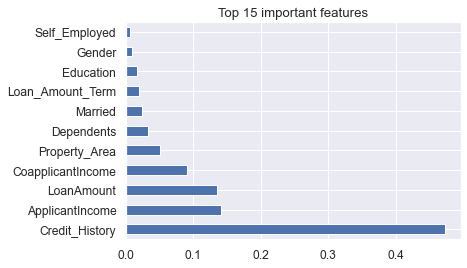

In [223]:
plot_features_importances = pd.Series(feature_importances, index=x_train.columns).sort_values()
plot_features_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

<div class="alert alert-block alert-info">
<b><h1>Interpretability</h1></div>
<a class="anchor" id="interpretability"></a>

In [224]:
features  = list(x_train.columns)

In [225]:
import lime
import lime.lime_tabular



explainerLime = lime.lime_tabular.LimeTabularExplainer(
    x_train.values,
    mode='classification',
    feature_names=features,
   class_names=["No", "Yes"],
   verbose=True
    )

def pred_fn(x):
    return model_gs.predict_proba(x).astype(float)


In [226]:
x_val

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
475,2,0,2,1,1,0.202536,1014.0,0.204052,360.0,1.0,1
577,2,1,0,1,0,0.038083,2739.0,0.146165,360.0,1.0,3
298,1,1,0,1,0,0.059988,2541.0,0.205499,480.0,1.0,1
275,2,0,1,1,0,0.032158,1842.0,0.153401,360.0,1.0,2
89,2,0,0,1,0,0.068584,4167.0,0.240232,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
417,2,0,2,1,1,0.017934,20000.0,0.332851,360.0,1.0,3
155,2,0,3,1,0,0.492876,0.0,0.855282,180.0,0.0,2
384,2,0,2,1,0,0.054620,0.0,0.131693,360.0,1.0,3
566,2,1,0,1,0,0.039369,0.0,0.088278,360.0,1.0,3


In [227]:
x_val.loc[[577]]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
577,2,1,0,1,0,0.038083,2739.0,0.146165,360.0,1.0,3


In [228]:
y_val.loc[[577]]

577    Y
Name: Loan_Status, dtype: object

In [229]:
exp = explainerLime.explain_instance(x_val.loc[[577]].values[0],
                                 pred_fn,
                                 num_features=len(x_val.columns)
                                 )
exp.show_in_notebook(show_all=True)

Intercept 0.5242752826808859
Prediction_local [0.57700262]
Right: 0.7863167686522771


In [230]:
import shap

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model_gs)

shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_train.iloc[0,:])

In [ ]:
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], features=x_train.columns)

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][0,:], x_train.iloc[0,:])


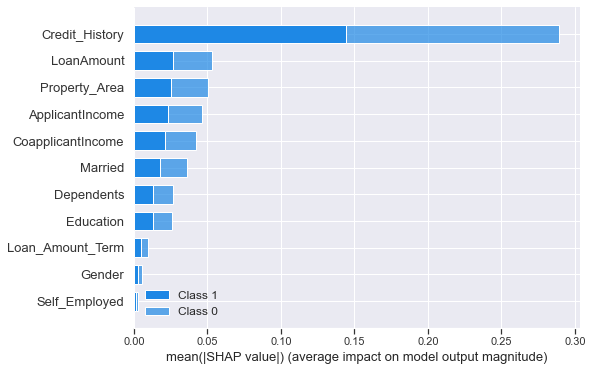

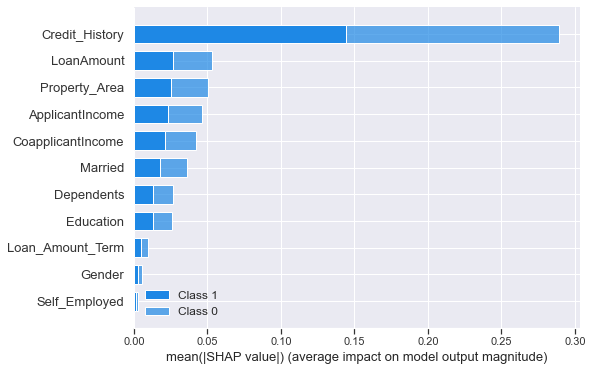

In [166]:
shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train, plot_type='bar')

In [174]:
x_train[['Gender']]

,Gender
134,2
57,2
174,2
201,2
255,1
...,...
595,2
319,2
593,2
581,2


In [176]:
shap.dependence_plot("Married",shap_values[1], x_train)


TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

In [159]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 134 to 524
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    int64  
 1   Married            491 non-null    int64  
 2   Dependents         491 non-null    int64  
 3   Education          491 non-null    int64  
 4   Self_Employed      491 non-null    int64  
 5   ApplicantIncome    491 non-null    float64
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         491 non-null    float64
 8   Loan_Amount_Term   491 non-null    float64
 9   Credit_History     491 non-null    float64
 10  Property_Area      491 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 66.0 KB


In [ ]:
test1

In [ ]:
pred_test1 = grid_search.predict(test1)

In [ ]:
pred_test12 = rf_random.predict(test1)

In [ ]:
sub = pd.DataFrame() 
sub['target'] = pred_test12
#sub.to_csv('file.csv', index =False)
# Let's write to google drive
sub.to_csv('/content/drive/My Drive/MLProjects/Loan_Hackathon/predict.csv', index =False)



In [ ]:
pred_test1

In [ ]:
pred_test12

In [ ]:
train1[l_target].replace(['Y','N'],[1,0],inplace=True)
X = train1
X = X.drop([l_target], axis=1)
y = train1[l_target]

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Logistic Regression for the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
#Predicting the Test set results
# y_pred is a vector of predictions that gives the pred of each of the test set observations
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

In [ ]:
#Evaluating performance of logistic regression classifier using confusion matrix so we can see no. of correct predictions and no. of incorrect predictions the classifier made.
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix result
cm

In [ ]:
cm